In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [13]:
def heun(p0: np.array, N: int, t: float) -> np.array:
    """Calculatue heuns method for the three body problem for N steps with step size t.

    Args:
        p0 (np.array): 12 dimensional vector of initial conditions corresponding to the following:
            p0[0] = x1, p0[1] = x2, p0[2] = x3, p0[3] = y1, p0[4] = y2, p0[5] = y3, 
            p0[6] = vx1, p0[7] = vx2, p0[8] = vx3, p0[9] = vy1, p0[10] = vy2, p0[11] = vy3
        N (int): number of steps
        t (float): step size

    Returns:
        np.array: np.array positions and velocities for each x and y of each planet
    """
    data = [p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], 
            p0[6], p0[7], p0[8], p0[9], p0[10], p0[11], 
            derivative(p0)[6], derivative(p0)[7], derivative(p0)[8], 
            derivative(p0)[9], derivative(p0)[10], derivative(p0)[11]]
    df = pd.DataFrame(data=[data], columns=['P1: X Position', 'P2: X Position', 
                                'P3: X Position', 'P1: Y Position', 'P2: Y Position', 
                                'P3: Y Position', 'P1: X Velocity', 'P2: X Velocity', 
                                'P3: X Velocity', 'P1: Y Velocity', 'P2: Y Velocity', 
                                'P3: Y Velocity', 'P1: X Acceleration', 'P2: X Acceleration', 
                                'P3: X Acceleration', 'P1: Y Acceleration', 'P2: Y Acceleration', 
                                'P3: Y Acceleration'])

    for i in range(0, N):
        ptemp = p0 + t * derivative(p0)
        dp0 = derivative(p0)
        dptemp = derivative(ptemp)
        p0 = p0 + t/2 * (dp0 + dptemp)
        data = [p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], p0[6], p0[7], p0[8], p0[9], p0[10], p0[11], 
            derivative(p0)[6], derivative(p0)[7], derivative(p0)[8], derivative(p0)[9], derivative(p0)[10], 
            derivative(p0)[11]]
        df2 = pd.DataFrame(data=[data], columns=['P1: X Position', 'P2: X Position', 
                                'P3: X Position', 'P1: Y Position', 'P2: Y Position', 
                                'P3: Y Position', 'P1: X Velocity', 'P2: X Velocity', 
                                'P3: X Velocity', 'P1: Y Velocity', 'P2: Y Velocity', 
                                'P3: Y Velocity', 'P1: X Acceleration', 'P2: X Acceleration', 
                                'P3: X Acceleration', 'P1: Y Acceleration', 'P2: Y Acceleration', 
                                'P3: Y Acceleration'])
        df2['P1: X Position'] = p0[0]
        df2['P2: X Position'] = p0[1]
        df2['P3: X Position'] = p0[2]
        df2['P1: Y Position'] = p0[3]
        df2['P2: Y Position'] = p0[4]
        df2['P3: Y Position'] = p0[5]
        df2['P1: X Velocity'] = p0[6]
        df2['P2: X Velocity'] = p0[7]
        df2['P3: X Velocity'] = p0[8]
        df2['P1: Y Velocity'] = p0[9]
        df2['P2: Y Velocity'] = p0[10]
        df2['P3: Y Velocity'] = p0[11]
        df = pd.concat([df, df2], ignore_index=True)
    
    df.insert(0, 'Time', [i * t for i in range(0, N + 1)])
    return df


def derivative(p0: np.array) -> np.array:
    """Calculates the derivative of the 12 dimensional vector p0.

    Args:
        p0 (np.array): 12 dimensional vecotr of initial conditions corresponding to the following:
            p0[0] = x1, p0[1] = x2, p0[2] = x3, p0[3] = y1, p0[4] = y2, p0[5] = y3, 
            p0[6] = vx1, p0[7] = vx2, p0[8] = vx3, p0[9] = vy1, p0[10] = vy2, p0[11] = vy3 

    Returns:
        np.array: 12 dimensional vector of the derivative of p0
    """
    p1 = 0 * p0
    p1[0] = p0[6]
    p1[1] = p0[7]
    p1[2] = p0[8]
    p1[3] = p0[9]
    p1[4] = p0[10]
    p1[5] = p0[11]
    p1[6] = - ((p0[0] - p0[1])/((p0[0]-p0[1])**2+(p0[3]-p0[4])**2)**(3/2)) - ((p0[0] - p0[2])/((p0[0]-p0[2])**2+(p0[3]-p0[5])**2)**(3/2))
    p1[7] = - ((p0[1] - p0[0])/((p0[1]-p0[0])**2+(p0[4]-p0[3])**2)**(3/2)) - ((p0[1] - p0[2])/((p0[1]-p0[2])**2+(p0[4]-p0[5])**2)**(3/2))
    p1[8] = - ((p0[2] - p0[0])/((p0[2]-p0[0])**2+(p0[5]-p0[3])**2)**(3/2)) - ((p0[2] - p0[1])/((p0[2]-p0[1])**2+(p0[5]-p0[4])**2)**(3/2))
    p1[9] = - ((p0[3] - p0[4])/((p0[0]-p0[1])**2+(p0[3]-p0[4])**2)**(3/2)) - ((p0[3] - p0[5])/((p0[0]-p0[2])**2+(p0[3]-p0[5])**2)**(3/2))
    p1[10] = - ((p0[4] - p0[3])/((p0[1]-p0[0])**2+(p0[4]-p0[3])**2)**(3/2)) - ((p0[4] - p0[5])/((p0[1]-p0[2])**2+(p0[4]-p0[5])**2)**(3/2))
    p1[11] = - ((p0[5] - p0[3])/((p0[2]-p0[0])**2+(p0[5]-p0[3])**2)**(3/2)) - ((p0[5] - p0[4])/((p0[2]-p0[1])**2+(p0[5]-p0[4])**2)**(3/2))
    return p1


def perterbations(N: int) -> list:
    """Randomly generates N positions within the first two quadrants of a circle 
        with radius less than or equal to 0.01.

    Args:
        N (int): number of positions to generate

    Returns:
        list: tuples of x and y positions
    """
    positions = []
    while len(positions) < N:
        x = random.randrange(-1000, 1000, 1) / 10000
        y = random.randrange(0, 1000, 1) / 10000
        if x**2 + y**2 <= 0.01:
            positions.append((x, y))
    return positions


def make_vis(pos: int, pert: int, title: str) -> None:
    """Creates a visualization of the three body problem with pert perturbations. Indended 
    to be used with subplots.

    Args:
        pos (int): subplot position for the visualization
        pert (int): number of perterbations to include in the plot
        title (str): title of the plot
    """
    mid_pos = perterbations(pert)

    p = np.array([-1, 1, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0])
    d = heun(p, 5000, 0.001)
    plt.subplot(pos)

    plt.title(title)
    plt.plot(d['P1: X Position'][0], d['P1: Y Position'][0], c='red', marker='x', label='Earth')
    plt.plot(d['P2: X Position'][0], d['P2: Y Position'][0], c='green', marker='x',label='Mars')
    plt.plot(d['P3: X Position'][0], d['P3: Y Position'][0], c='blue', marker='x', label='Venus')
    plt.plot(d['P1: X Position'], d['P1: Y Position'], c='red', alpha=0.3, label='Earth')
    plt.plot(d['P2: X Position'], d['P2: Y Position'], c='green', alpha=0.3, label='Mars')
    plt.plot(d['P3: X Position'], d['P3: Y Position'], c='blue', alpha=0.3, label='Venus')

    for x, y in mid_pos:
        p = np.array([-1, 1, x, 0, 0, y, 0, 0, 0, -1, 1, 0])
        d = heun(p, 5000, 0.001)        
        plt.plot(d['P1: X Position'], d['P1: Y Position'], c='red', alpha=0.5)
        plt.plot(d['P2: X Position'], d['P2: Y Position'], c='green', alpha=0.5)
        plt.plot(d['P3: X Position'], d['P3: Y Position'], c='blue', alpha=0.5)
    return

def generate_avg(pert: int, pos: int, duration: int, stepsize: float) -> None:
    """Creates an average of pert perterbations using Heun's method for a particular duration and stepsize.

    Args:
        pert (int): number of perterbations to plot
        duration (int): how many steps to take
        stepsize (float): step size for heun's method
    """
    x1 = []
    x2 = []
    x3 = []
    y1 = []
    y2 = []
    y3 = []
    mid_pos = perterbations(pert)
    plt.subplot(pos)

    for x, y in mid_pos:
            p = np.array([-1, 1, x, 0, 0, y, 0, 0, 0, -1, 1, 0])
            d = heun(p, duration, stepsize)
            x1.append(d['P1: X Position'])
            x2.append(d['P2: X Position'])
            x3.append(d['P3: X Position'])
            y1.append(d['P1: Y Position'])
            y2.append(d['P2: Y Position'])
            y3.append(d['P3: Y Position'])
            plt.plot(d['P1: X Position'], d['P1: Y Position'], c='red', alpha=0.1)
            plt.plot(d['P2: X Position'], d['P2: Y Position'], c='green', alpha=0.1)
            plt.plot(d['P3: X Position'], d['P3: Y Position'], c='blue', alpha=0.1)

    x1avg = np.mean(x1, axis=0)
    x2avg = np.mean(x2, axis=0)
    x3avg = np.mean(x3, axis=0)
    y1avg = np.mean(y1, axis=0)
    y2avg = np.mean(y2, axis=0)
    y3avg = np.mean(y3, axis=0)

    plt.title(f"Average of {pert} Perturbations")
    plt.plot(x1avg, y1avg, c='red', alpha=1)
    plt.plot(x2avg, y2avg, c='green', alpha=1)
    plt.plot(x3avg, y3avg, c='blue', alpha=1)
    return

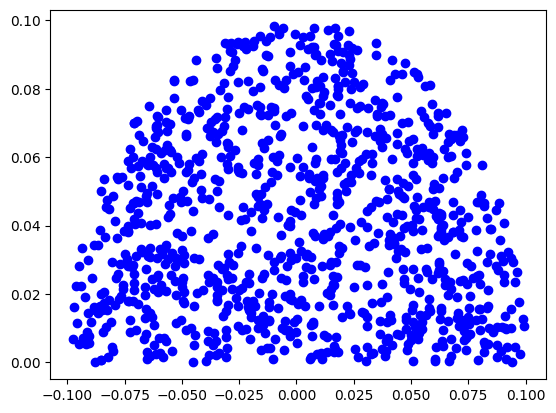

In [15]:
p = perterbations(1000)
for x, y in p:
    plt.scatter(x, y, c='blue')

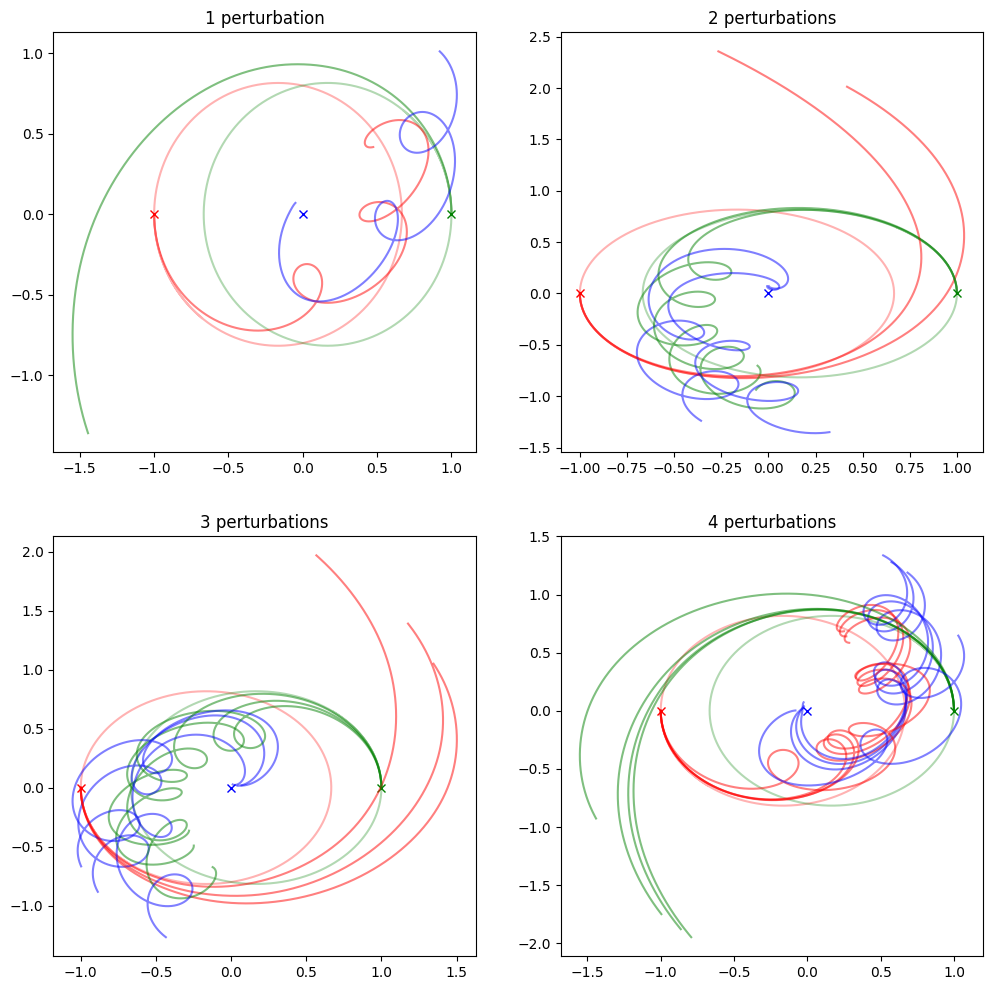

In [4]:
plt.figure(1, figsize=(12,12))
make_vis(221, 1, "1 perturbation")
make_vis(222, 2, "2 perturbations")
make_vis(223, 3, "3 perturbations")
make_vis(224, 4, "4 perturbations")
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

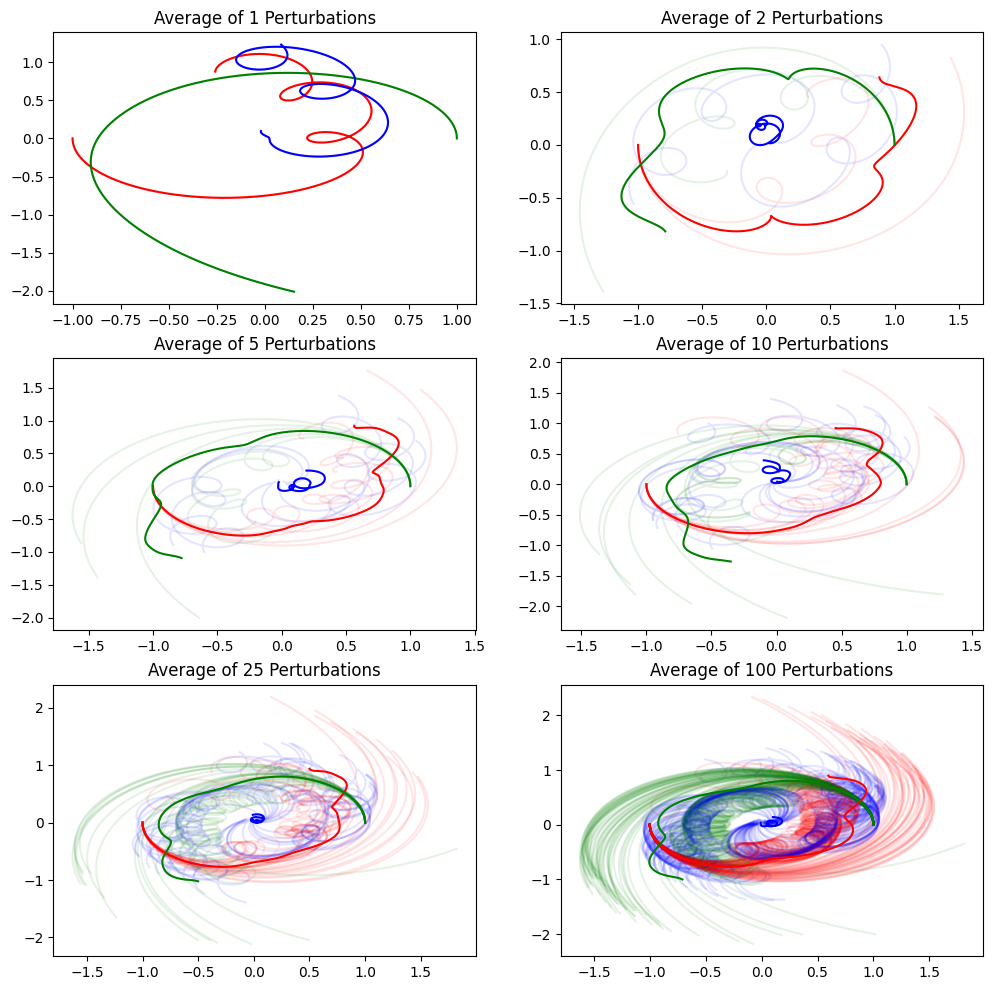

In [11]:
plt.figure(2, figsize=(12,12))
generate_avg(1, 321, 5000, 0.001)
generate_avg(2, 322, 5000, 0.001)
generate_avg(5, 323, 5000, 0.001)
generate_avg(10, 324, 5000, 0.001)
generate_avg(25, 325, 5000, 0.001)
generate_avg(100, 326, 5000, 0.001)
plt.show()